# Importing all necessary files

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib
%matplotlib inline 

matplotlib.rcParams["figure.figsize"] = (20,10)

# Importing the Data-set

In [2]:
bhd = pd.read_csv("C:\\Users\\HP\\x decoder\\dataset\\house_price_prediction\\Bengaluru_House_Data.csv")
bhd.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Checking the Shape of the Data-set

In [3]:
bhd.shape

(13320, 9)

# Describing the Data-set

In [4]:
bhd.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# Examine the area_type features using .agg()

we see how many sample have same features, as in area_type column of data_set

In [5]:
bhd.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Here we drop columns such as area_type, society, balcony and availability, column wise,
as they do not help us to predict the price.

In [6]:
bhd_drop = bhd.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
bhd_drop.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


now we check is there any null value present in the data-set.

In [7]:
bhd_drop.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

The above output will tell you about the number of Nan values present in each column of the Data-set.

As our dataset is of 13320 samples dropring down about 100 values coundn't affect much. 

So, We will drop all the sample which have these null value in it.

In [8]:
bhd2 = bhd_drop.dropna()

In [9]:
bhd2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

Now, we again check the shape of our new data-set i.e. bhd3

In [10]:
bhd2.shape

(13246, 5)

In [11]:
bhd2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


## Now we explore the size column

In [12]:
bhd2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Here, we notice that there are few value such as 4 Bedroom & 4 BHK, 1 Bedroom & 1 BHK etc.

All such values are essentially same so we create a new column as "bhk"

In [13]:
bhd2['bhk'] = bhd2['size'].apply(lambda x: int(x.split(" ")[0]))

# here we are creating a column name "bhk"
# for that we use size column  and we use lambda function to take unique value of String in size column.
# now we split the string into two parts using " " (space) as split position.
# after spliting we choose the first value using its index number [0]
# now the value we get in return is a numeric value but its data type is string for that we use int() to whole spliting process.
# so that the output of the whole split will be a numeric data type

<ipython-input-13-aee961a314a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bhd2['bhk'] = bhd2['size'].apply(lambda x: int(x.split(" ")[0]))


In [14]:
bhd2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


To check what we have done is correct we check the bhk unique values.

In [15]:
bhd2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

Here we see that we have 43, 18 etc value. 

For that we check what kind of home has 43 entry.

In [16]:
bhd2[bhd2.bhk>10]

,location,size,total_sqft,bath,price,bhk
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,150.0,11


In the above output you find out that there are some error in the data-set.
Because you cannot have 43 bedroom on 2400sqft of area and many others.

In [17]:
bhd2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In the above output we see that there are some sample who have range in place of a integer value.

So in order to find out all such sample we create a user defined function to seprate every range from the data-set.

In [18]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

#  we will try to convert a value in total_sqft column into float and if it is not a valid value. like range

# then the except block will execute. it will return False

# if the value is float then float will execute. it will return True

In [19]:
# applying is_float function to the bhd2

bhd2[~bhd2['total_sqft'].apply(is_float)]

#  ~ (negate oeprator) = this operator will return a dataFrame 

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [20]:
bhd2[~bhd2['total_sqft'].apply(is_float)].head(40)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


as we explore more we found that there are some more uncommon value such in yards, sq.mt etc

# Cleaning Of Data

to handle any such non-uniformity in the data-set:

    Range- anytime we have range, we take the average of the range.

    for any awkward value like 'yards' and 'sq. meter' we just ignore those rows.  OR  convert every such value into a 
    desired value

In [21]:
# taking out Range average

def range_to_num(x):
    spt = x.split('-')
    if len(spt) == 2:
        return (float(spt[0]) + float(spt[1]))/2
    try:
        return float(x)
    except:
        return None

# we give name to the function
# we split the range value using "-" as separator
# only if split has two index then only it will enter if function and return average of range as output
# if split dosen't have two index then it goes to try function and return the value as float.

In [22]:
range_to_num('12345')

12345.0

12345 is just number therfore it can't be split and return it as 12345.0 i.e. a float value

In [23]:
range_to_num('12345-6789')

9567.0

12345-6789 is a range. therefore average is return as output.

In [24]:
range_to_num('361.33Sq. Yards')

Here, the function dosen't return anything. because it is not a kind of number which could be executed by the function.

In [25]:
bhd3 = bhd2.copy()

# .copy() is used to create a copy of bhd2 file. in a seprate memory location.

In [26]:
bhd3['total_sqft'] = bhd3['total_sqft'].apply(range_to_num)

In [27]:
bhd3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [28]:
bhd3.head(40)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


Now in the above dataFrame we can see that Range value is replaced by average value.

Any awkward value like yards & sq.meter is been removed from the dataset.

In [29]:
bhd3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft         2475
bath                  4
price               186
bhk                   4
Name: 30, dtype: object

In [30]:
bhd4 = bhd3.copy()
bhd4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [31]:
bhd4['price_per_sqft'] = bhd4['price']*10000/ bhd4['total_sqft']

In [32]:
bhd4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


## Now we explore location column

In [33]:
bhd4['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [34]:
len(bhd4['location'].unique())

# counting the number of unique columns.

1304

In [35]:
# there will be location which have 1 or 2 entry in the dataset

In [36]:
bhd4.location = bhd4.location.apply(lambda x: x.strip())

# the above will just remove any extra space in the location column

In [37]:
location_stats = bhd4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

# the above pogram will groupby the dataframe by using location column, 
# and whatever i get as a result on that give me a location column on which i will perform aggregation function
# which will give me the count for a location in decending column.

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

Many location has 100+ datapoint in the data-set, whereas  many location have just 1 datapoint in the dataset.

So, we name all the location who have less than 10 datapoint as others_location.

In [38]:
len(location_stats[location_stats<=10])

1052

there are 1052 out of 1293 who have less than 10 data point.

In [39]:
location_stats_lessthan_10 = location_stats[location_stats<=10]
location_stats_lessthan_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [40]:
len(bhd4.location.unique())

# total number of unique location

1293

In [41]:
bhd4.location = bhd4.location.apply(lambda x: 'other' if x in location_stats_lessthan_10 else x )

len(bhd4.location.unique())

242

Now we can see that 1293 data points is now reduced to 242 data points.

In [42]:
bhd4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


# Outliers Detection

 data extreme value which change can alter our result.

In [43]:
bhd4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,324.786325
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,746.705710
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,1818.181818
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,482.824427
9,other,6 Bedroom,1020.0,6.0,370.00,6,3627.450980


In [44]:
# generally a room has 300sqft of area

bhd4[bhd4.total_sqft/bhd4.bhk<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,3627.450980
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,3333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,1066.098081
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,629.629630
70,other,3 Bedroom,500.0,3.0,100.0,3,2000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,1557.142857
13279,other,6 Bedroom,1200.0,5.0,130.0,6,1083.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,909.090909
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,904.392765


In [45]:
bhd4.shape

(13246, 7)

In [46]:
bhd5 = bhd4[~(bhd4.total_sqft/bhd4.bhk<300)]
bhd5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,668.983493
13316,other,4 BHK,3600.0,5.0,400.00,4,1111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,525.854514
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,1040.733632


All the outliers have been removed

## Exploring price_per_sqft

In [47]:
bhd5.price_per_sqft.describe()

count    12456.000000
mean       630.850283
std        416.812734
min         26.782981
25%        421.052632
50%        529.411765
75%        691.666667
max      17647.058824
Name: price_per_sqft, dtype: float64

In the above output we see that:

      min value     26.782981                                          max value  17647.058824

Now, we know any such case is not possible in Banglore.

So in order to remove any such outliers. We will build a function that will remove any such outliers per location

We have to do this to every location because some location will have high price and some location will have low price

for every location we have to find mean and standard deviation and then fillter out any such value which are beyond standard deviation.

In [48]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        
        m = np.mean(subdf.price_per_sqft)                 # Mean
        st= np.std(subdf.price_per_sqft)                  # Stand deviation
        
        reduce_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <=(m+st))]        # filtering the DataFrame
        df_out = pd.concat([df_out,reduce_df],ignore_index=True)
    return df_out


In [49]:
bhd6 = remove_pps_outlier(bhd5)
bhd6.shape

(10241, 7)

Now we are left with only 10241 samples

Now in the DataFrame we have noticed that some 2bhk and 3bhk have the same price. in order to find all such plots we use a function which create a scatter plot which mark 2bhk and 3bhk.

In [50]:
# plotting

def plot_scatter_chart(df, location):   
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', label='3 BHK', s=50, marker='+')
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

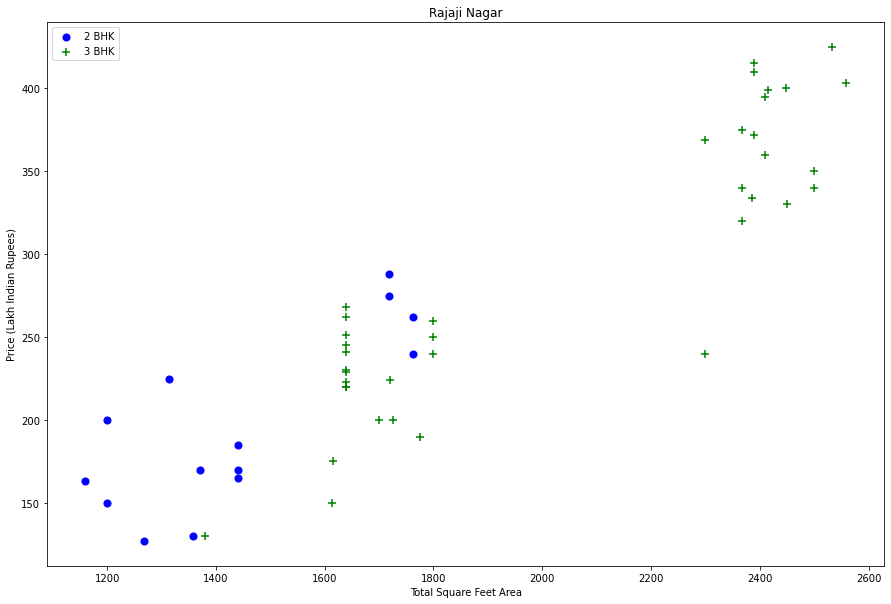

In [51]:
plot_scatter_chart(bhd6,'Rajaji Nagar')

In Total square feet area between 1600 to 1800 there are some 2bhk which are higher to price of 3bhk.

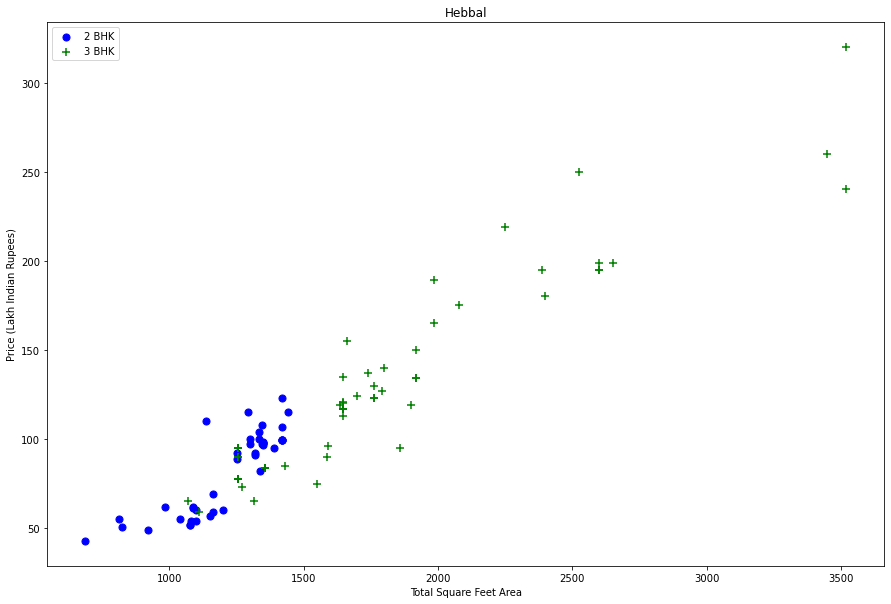

In [52]:
plot_scatter_chart(bhd6,'Hebbal')

In Total square feet area between 1000 to 1500 there are some 2bhk which are higher to price of 3bhk.

So we have to remove these kind of data points which can alter the result.

so for that we create a function which will filter out any such data point in same location have same price value for x-bhk and y-bhk.

For that we use mean value, standard deviation value and count value in a dictionary.


In [53]:

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')



In [54]:
bhd7 = remove_bhk_outliers(bhd6)
bhd7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,1501.754386
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,1190.184049
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,1253.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,1083.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,1198.380567
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,583.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,1111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,813.008130
10237,other,1 Bedroom,812.0,1.0,26.0,1,320.197044


Now, we are left with only 7329 data points 

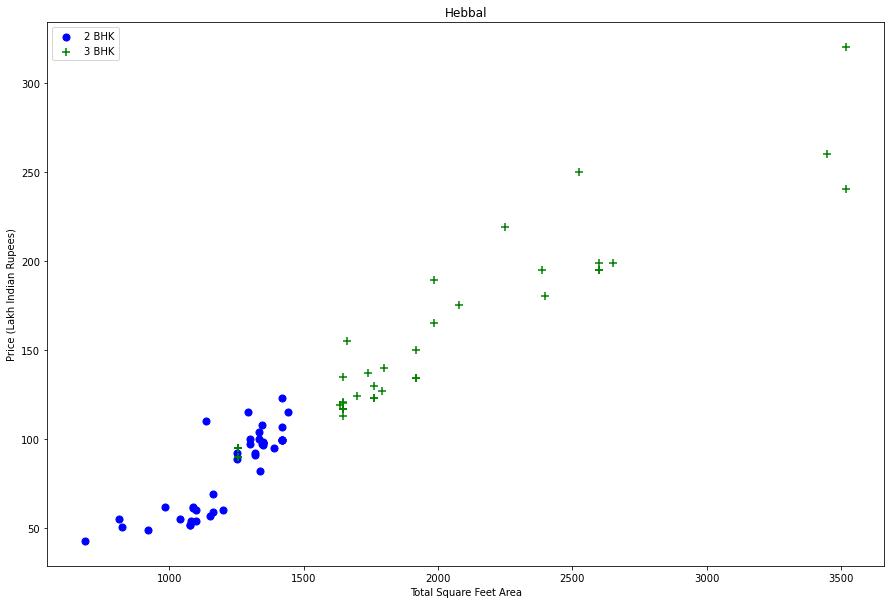

In [55]:
# now we again plot the scatter plot to see the end result after removing outliers.

plot_scatter_chart(bhd7,'Hebbal')

Now, we can see that majority of the outliers have been removed from the data-set

Text(0, 0.5, 'Count')

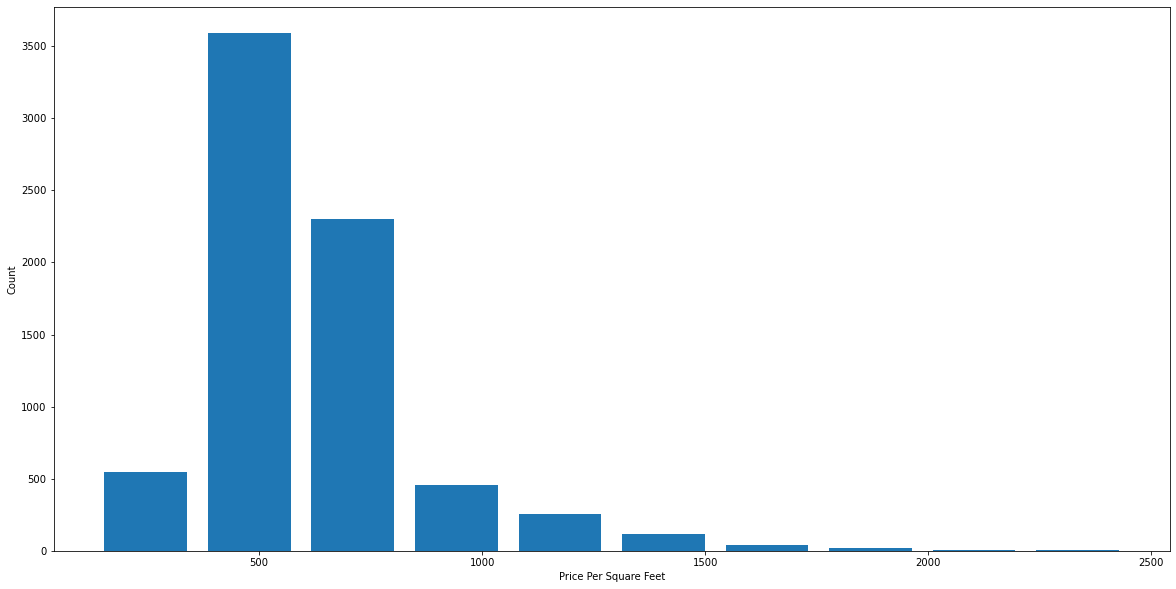

In [56]:
# Now we plot a histogram which will tell us how many property have in per sqft are.

import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(bhd7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

We can see that in range of 0 to 1500 we have majority of our data points.

It look's like a normal distribution.

## Exploring Bathroom Feature

In [57]:
bhd7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Now it is very strange that a house have 10 or more than 10 bathroom. so let's Check how many such property are there.

In [58]:
bhd7[bhd7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,400.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,437.500000
8575,other,16 BHK,10000.0,16.0,550.0,16,550.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,250.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,506.912442


There are only 5 such property who have more than 10 bathroom.
But on checking we found out that they have a bathroom to each room

But it is quite unusal that you have less room and more bathroom in your house.


Text(0, 0.5, 'Count')

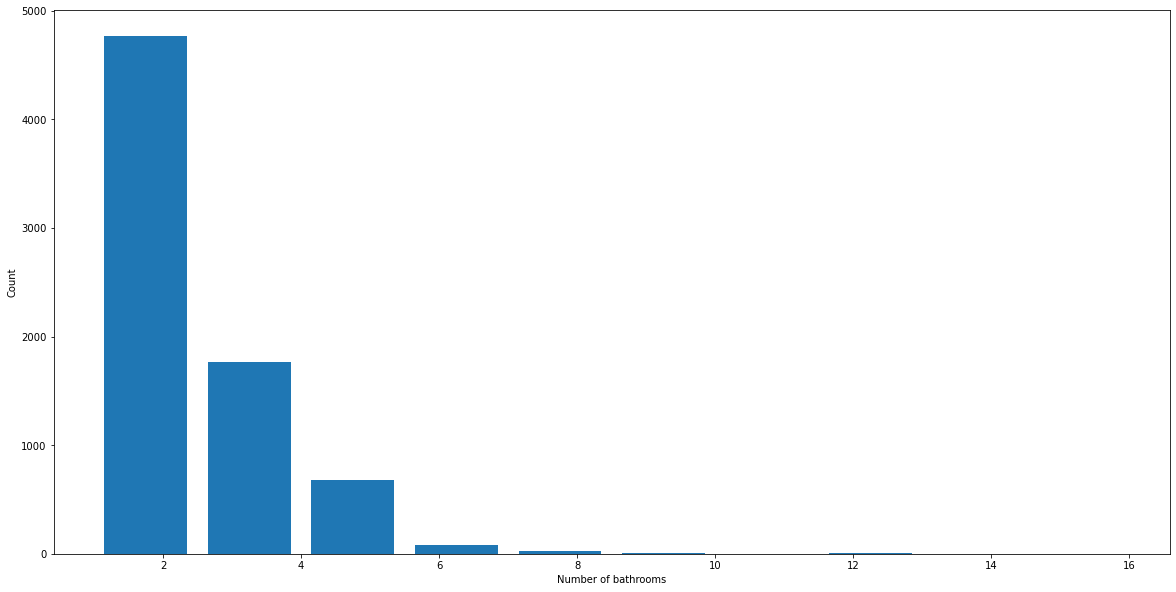

In [59]:
# Plot a histogram 

plt.hist(bhd7.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")


Now we can clearly see that most of the house have 2 bathroom.

Now we will remove any such data-points which have more bathroom than bedroom.

In [60]:
# Now we will find every such data point which have bhk + 2 = bathroom, because having 2 extra bathroom is not an outliers

bhd7[bhd7.bath > bhd7.bhk+1]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
36,2nd Stage Nagarbhavi,6 Bedroom,3000.0,8.0,451.0,6,1503.333333
37,2nd Stage Nagarbhavi,6 Bedroom,2400.0,8.0,450.0,6,1875.000000
530,Arekere,4 BHK,2710.0,6.0,142.0,4,523.985240
580,BTM 2nd Stage,3 Bedroom,1260.0,5.0,185.0,3,1468.253968
813,Bannerghatta,4 BHK,3012.0,6.0,250.0,4,830.013280
...,...,...,...,...,...,...,...
9915,other,4 BHK,6652.0,6.0,510.0,4,766.686711
10036,other,2 BHK,600.0,4.0,70.0,2,1166.666667
10089,other,3 Bedroom,5656.0,5.0,499.0,3,882.248939
10202,other,4 BHK,6652.0,6.0,660.0,4,992.182802


In [61]:
bhd7.shape

(7329, 7)

In [62]:
bhd8 = bhd7[bhd7.bath<bhd7.bhk+2]

In [63]:
bhd8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,1501.754386
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,1190.184049
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,1253.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,1083.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,1198.380567
...,...,...,...,...,...,...,...
10232,other,2 BHK,1200.0,2.0,70.0,2,583.333333
10233,other,1 BHK,1800.0,1.0,200.0,1,1111.111111
10236,other,2 BHK,1353.0,2.0,110.0,2,813.008130
10237,other,1 Bedroom,812.0,1.0,26.0,1,320.197044


so we have removed total 78 data point which have more bathroom than considered range.

Now, we can say that the data-set is clean and now we can moe towards Machine Learning training

# Machine Learning

In [64]:
# For Machine Learning we see that Size and Price_per_sqft is not required so we drop these columns

In [65]:
bhd9 = bhd8.drop(['size', 'price_per_sqft'], axis='columns')
bhd9

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2
10233,other,1800.0,1.0,200.0,1
10236,other,1353.0,2.0,110.0,2
10237,other,812.0,1.0,26.0,1


as the dataframe has location column which is a text column. 

As we want it to pass it through machine learning we need to convert text into number.

so that we machine can understand it and perform necessary operation.

### One hot encoding (Dummy Method)

In [66]:
bhd9

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2
10233,other,1800.0,1.0,200.0,1
10236,other,1353.0,2.0,110.0,2
10237,other,812.0,1.0,26.0,1


In [67]:
pd.get_dummies(bhd9.location).head(40)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


for each location it will create new column and fill it by 1, remaining all the columns filled with 0. 


In [68]:
dummies = pd.get_dummies(bhd9.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
bhd10 = pd.concat([bhd9, dummies .drop('other', axis= 'columns')], axis='columns')
bhd10

# in one hot encoding we learn that to avoid dummy variable trap we should have n-1 dummy variable column.
# Here we drop 'other' column. if all the columns is filled with 0. then it automatically means that it belong to others column.

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# Now we drop location columns

bhd11 = bhd10.drop('location', axis='columns')
bhd11

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# just to check the shape of dataframe.

bhd11.shape

(7251, 245)

In [72]:
# x contain only independent variable, so we drop all the dependent variable
# here price is the dependent variable so we drop it

X = bhd11.drop('price', axis='columns')
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
Y = bhd11.price
Y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [74]:
# now we divide our data set into training & testing.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

# 20% for test sample, remaining 80% for training.

In [75]:
#  creating linear regression model

from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()                                 
lr_clf.fit(X_train, y_train)                                 # fit x_train and y_train 
lr_clf.score(X_test, y_test)                                 # evaluate the score of model


0.8452277697874278

so, the score is 0.84522

### trying on different models 

In [76]:
#  K Fold cross validation to measure accuracy of our LinearRegression model

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


In [77]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)


array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In Majority of the split we get result more than 0.80  except the one with 0.77166234

In [78]:
# Grid search CV

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


In [79]:
# in order to find out the best suitable model we create a function 

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X, Y)

,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': False}
1,lasso,0.687440,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.716588,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


Linear_regression has the best sc0ore, wheareas lasso regression has the least score.

So, we conclude that linear regression model is the best fit.

we have already creatred a linear regression classifier, so we are going to use that one.

In [80]:
# X.columns

In [81]:
# we create a function to predict the price  

def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [84]:
np.where(X.columns=='1st Phase JP Nagar')[0][0]

# This method will just give us the index number of the columns.
# and then based upon the input given it will predict the price of the property.

4

In [85]:
predict_price('1st Phase JP Nagar',1000, 2, 2)


83.49904677167729

value is in Lakhs rupeee

In [86]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

86.805193951943

In [87]:
predict_price('Indira Nagar',1000, 2, 2)


181.27815484007027

In [88]:
predict_price('Indira Nagar',1000, 3, 3)

184.58430202033597